In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scripts import functions

#setup color constants
BLACK = "#000000"
WHITE = "#FFFFFF"
GRAY = "#3B3131"

# load dataframe
df = functions.load('../../data/processed/data.csv')

**Task 5 Research Analysis**

Research Question: What are the amount of turns in each game for White Winners, Black
Winners. We also wanted to find out the amount of turns overall for each games. In the future
we are looking to find an average number of turns for a winning game. This can be shown in the
Scatterplot shown below.

- It seems that the threshold of turns durastically increases in games that end as a draw, as oppopsed to a white winner or a a black winner.
- It also seems that the difference between white and black winning is quite small. I would like to research the exact difference in the future.

In our analyses, we looked into the amount of turns each game, and formulated a histogram
from the results which can be shown below. 
1. The majority of the games consisted of around 40 - 8 terms, with a steep drop off after that. 
2. Most games were less than 75 turns, afterwards the amount of games steeply falls.
3. In the future, I would like to investigate how many games ended in a draw after around 150 turns.

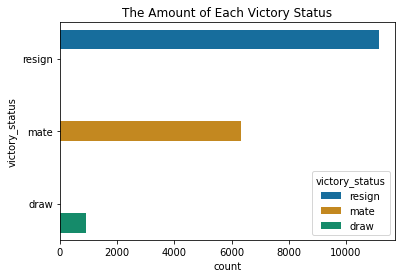

In [2]:
ax = sns.countplot(y='victory_status', data=df,palette='colorblind', hue = 'victory_status')
plt.title('The Amount of Each Victory Status')
plt.savefig('../../images/victory_status.png')

**Research Question:** 

What is the most common victory status? and Why?*
In our analysis, first we wanted to understand what is the most common victory status.
Eventually, we would like to determine why that certain status&#39; happen more than others, and
what could lead to a specific one. Shown in the chat below is a countplot of the 3 victory status&;
from our dataset:

1. Mate
2. Resign
3. Draw


Shown the above countplot, resign seems to be the most common victory status. It happens in
almost double the amount of games that mate does. We are not sure why this is. Later in our
analyses, we are going to see all the different types of openings to a match. This could be a
possible effect of a victory status.

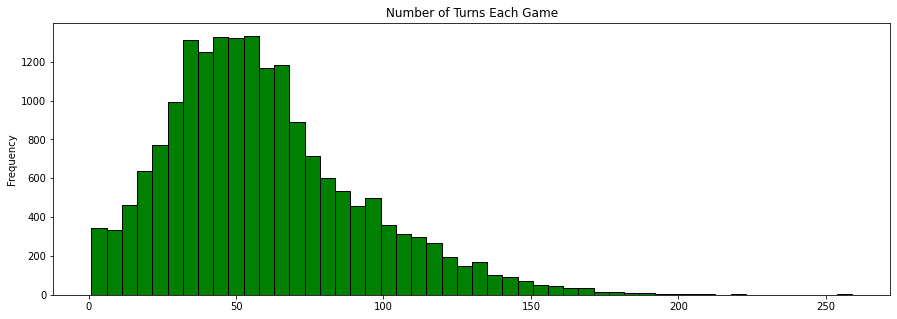

In [3]:
df['turns'].plot(kind='hist', bins=50, figsize=(15,5), facecolor='green',edgecolor='black')
plt.title('Number of Turns Each Game')
plt.savefig('../../images/number_turns.png')

In [4]:
#The openings were investigated with their respective outcomes.
#Which openings are most likely to result in a black win, white win, and draw?

#instance helper class
win_count = functions.WinCount()
win_count.setup(df)

#create dicts
white_wins = win_count.create_winner_specific_dict("white")
black_wins = win_count.create_winner_specific_dict("black")
draw_occurences = win_count.create_winner_specific_dict("draw")

#sieve dicts
sieved_win_count = win_count.sieve(threshold=300)
sieved_white_win_count = win_count.sieve_winner_specific_dict(winner_dict=white_wins, threshold=200)
sieved_black_win_count = win_count.sieve_winner_specific_dict(winner_dict=black_wins, threshold=200)
sieved_draw_occurences_count = win_count.sieve_winner_specific_dict(winner_dict=draw_occurences, threshold=20)

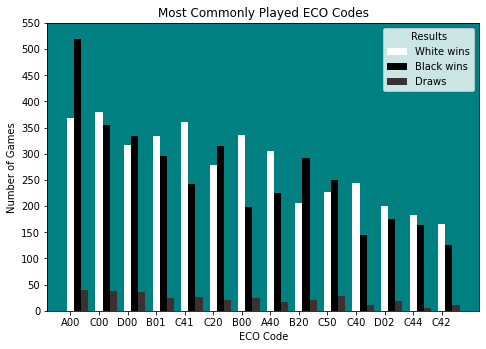

In [5]:
# take sieved_win_count and separate it into [eco codes], [win count dict] + sort it alphabetically 
totals = win_count.totals(sieved_win_count)
sorted_sieved_win_count = {k: v for k, v in sorted(sieved_win_count.items(), key=lambda item: totals[item[0]], reverse=True)}
x, y = zip(*sorted_sieved_win_count.items())

# turn win count dict into 2d list for plotting [[white], [black], [draw]]
# this has to be done because sieved_win_count is a 2d dict
temp = [[], [], []]
for d in y:
    temp[0].append(d["white"])
    temp[1].append(d["black"])
    temp[2].append(d["draw"])
y = temp

#setup and plot
max_ytick = max(*y[0], *y[1], *y[2]) + max(*y[0], *y[1], *y[2]) // 10
ystep = 50
index = np.arange(len(x))
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.bar(index + 0.00, y[0], color="white", width=0.25)
ax.bar(index + 0.25, y[1], color="black", width=0.25)
ax.bar(index + 0.50, y[2], color="#3B3131", width=0.25)
ax.legend(title="Results", labels=["White wins", "Black wins", "Draws"])
ax.set_xticks(index)
ax.set_xticklabels(x)
ax.set_yticks(np.arange(0, max_ytick, ystep))
ax.set_facecolor("#008080")

plt.xlabel("ECO Code")
plt.ylabel("Number of Games")
plt.title("Most Commonly Played ECO Codes")
plt.savefig("../../images/commonly_played_eco_codes.png")

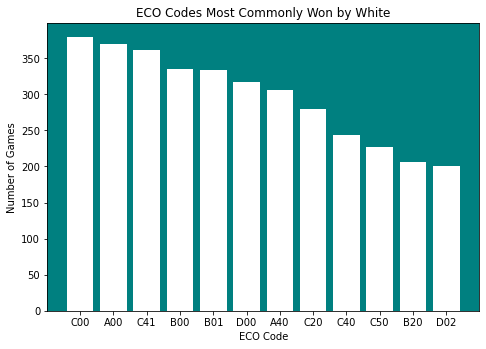

In [6]:
x, y = zip(*sorted(sieved_white_win_count.items(), key=lambda item: item[1], reverse=True))

max_ytick = max(y) + max(y) // 10
ystep = 10
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.bar(x=x, height=y, color="white")
ax.set_facecolor("#008080")

plt.xlabel("ECO Code")
plt.ylabel("Number of Games")
plt.title("ECO Codes Most Commonly Won by White")
plt.savefig("../../images/white_won_eco_codes.png")

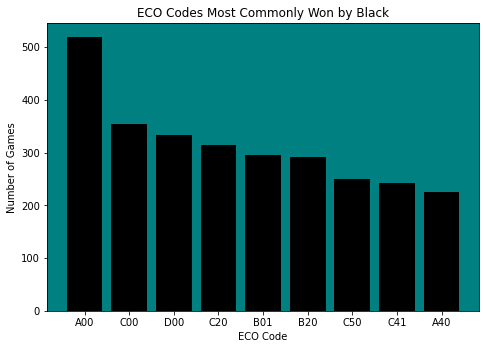

In [7]:
x, y = zip(*sorted(sieved_black_win_count.items(), key=lambda item: item[1], reverse=True))

max_ytick = max(y) + max(y) // 10
ystep = 10
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.bar(x=x, height=y, color="black")
ax.set_facecolor("#008080")

plt.xlabel("ECO Code")
plt.ylabel("Number of Games")
plt.title("ECO Codes Most Commonly Won by Black")
plt.savefig("../../images/black_won_eco_codes.png")

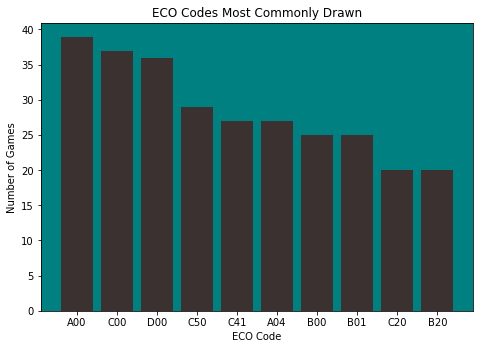

In [8]:
x, y = zip(*sorted(sieved_draw_occurences_count.items(), key=lambda item: item[1], reverse=True))

max_ytick = max(y) + max(y) // 10
ystep = 10
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.bar(x=x, height=y, color="#3B3131")
ax.set_facecolor("#008080")

plt.xlabel("ECO Code")
plt.ylabel("Number of Games")
plt.title("ECO Codes Most Commonly Drawn")
plt.savefig("../../images/drawn_eco_codes.png")